In [1]:
from krxns.config import filepaths
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

In [ ]:
whitelist_fn = "top_25_whitelist"
rxns_fn = "sprhea_240310_v3_mapped"
atom_lb = 0.2
multi_nodes = True
strategy = 'greedy-tanimoto'
max_steps = 100

In [3]:
traversed = defaultdict(dict)
fp = filepaths["results"] / "graph_traversal" / f"{rxns_fn}" / f"traversed_paths_{strategy}_max_steps_{max_steps}_{whitelist_fn}_atom_lb_{int(atom_lb * 100)}p_multi_nodes_{multi_nodes}.parquet"
traversed = pd.read_parquet(fp)

In [4]:
reached = {}
n_pairs = len(traversed)
for i, row in traversed.iterrows():
    path = [int(elt) for elt in row['path'].split(',')]
    if path[-1] == row['target']:
        reached[(row['starter'], row['target'])] = path

print(f"{len(reached)} / {n_pairs} = {len(reached) / n_pairs}")

3 / 725 = 0.004137931034482759


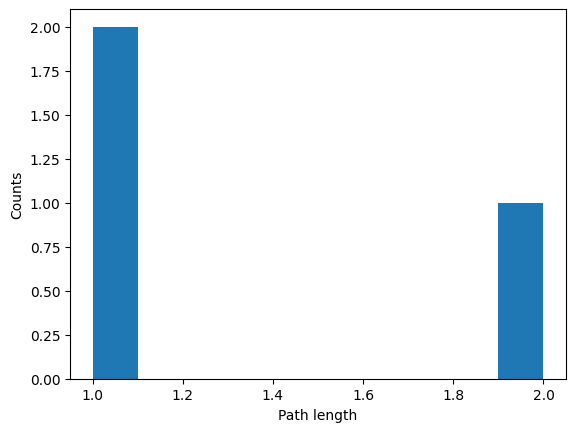

In [5]:
flat_lens = [len(p) - 1 for p in reached.values()]
fig, ax = plt.subplots()
ax.hist(flat_lens, bins=10)
ax.set_ylabel("Counts")
ax.set_xlabel("Path length")
plt.show()